In [6]:
%reset -fs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [7]:
df = pd.read_csv('betting_data.csv', index_col=0)

In [8]:
stat_df = pd.read_csv('stathead_data.csv')

In [9]:
# This is a comprehensive datset of player performance by game since the beginning of the season. Taken from Stathead.com.
stat_df.head(20)

,Rk,Player,Age,Pos,Tm,Unnamed: 5,Opp,Unnamed: 7,Date,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TS%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
0,1,LaMarcus Aldridge\aldrila01,36-092,F-C,BRK,@,MIL,L,2021-10-19,0,16,0,2,0.000,0,2,0.000,0,0,NaN,1,4,0.250,0.133,0,3,3,1,0,1,1,2,1,-1.1,-15.2
1,2,Grayson Allen\allengr01,26-011,G,MIL,NaN,BRK,W,2021-10-19,1,28,3,10,0.300,0,0,NaN,3,10,0.300,1,1,1.000,0.479,0,4,4,6,2,0,0,0,10,11.6,6.4
2,3,Giannis Antetokounmpo\antetgi01,26-317,F-G,MIL,NaN,BRK,W,2021-10-19,1,31,12,25,0.480,11,21,0.524,1,4,0.250,7,9,0.778,0.552,5,9,14,7,1,2,4,4,32,26.4,11.4
3,4,Thanasis Antetokounmpo\antetth01,29-093,F,MIL,NaN,BRK,W,2021-10-19,0,12,2,3,0.667,2,3,0.667,0,0,NaN,2,2,1.000,0.773,1,3,4,1,0,1,0,1,6,7.3,8.0
4,5,Carmelo Anthony\anthoca01,37-143,F,LAL,NaN,GSW,L,2021-10-19,0,26,3,9,0.333,1,5,0.200,2,4,0.500,1,2,0.500,0.455,0,4,4,2,0,0,1,2,9,4.3,-3.2
5,6,Kent Bazemore\bazemke01,32-110,G-F,LAL,NaN,GSW,L,2021-10-19,1,31,3,9,0.333,1,1,1.000,2,8,0.250,0,0,NaN,0.444,0,2,2,0,0,1,1,4,8,1.6,-5.5
6,7,DeAndre' Bembry\bembrde01,27-107,F,BRK,@,MIL,L,2021-10-19,0,4,0,0,NaN,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,-9.8
7,8,Nemanja Bjelica\bjeline01,33-163,F,GSW,@,LAL,W,2021-10-19,0,26,6,7,0.857,5,6,0.833,1,1,1.000,2,2,1.000,0.952,2,9,11,4,1,0,1,2,15,18.6,13.6
8,9,Avery Bradley\bradlav01,30-327,G,LAL,NaN,GSW,L,2021-10-19,0,8,2,3,0.667,0,0,NaN,2,3,0.667,0,0,NaN,1.000,1,0,1,1,0,0,1,2,6,4.3,10.6
9,10,Bruce Brown\brownbr01,25-065,G,BRK,@,MIL,L,2021-10-19,0,4,0,0,NaN,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,1,1,0,0,1,0,0,0,1.0,4.9


In [10]:
# This is a comprehensive dataset on the individual wagers, and consensus lines offered for each on points prop bets to-date for the season. Taken from bettingpros.com
df.head(20)

,Date,Name,Team,Position,Opp,Home/Away,Line,Moneyline,Projection,Diff,Pick,Result,pick_over_under,seven_day_accuracy,successful_pick
0,2021-10-21,Bogdan,ATL,G,DAL,vs.,15.5,-115,16.57,1.07,16.0,11,o,0.47,0
1,2021-10-23,Bogdan,ATL,G,CLE,@,14.5,-115,15.29,0.79,14.5,5,o,0.45,0
2,2021-10-25,Bogdan,ATL,G,DET,vs.,15.5,-115,12.85,-2.65,13.5,14,u,0.45,0
3,2021-10-28,Bogdan,ATL,G,WAS,@,12.5,-105,16.72,4.22,12.5,14,o,0.42,1
4,2021-10-30,Bogdan,ATL,G,PHI,@,12.5,-113,15.71,3.21,12.5,13,o,0.45,1
5,2021-11-01,Bogdan,ATL,G,WAS,vs.,12.5,-115,17.02,4.52,12.5,16,o,0.52,1
6,2021-11-03,Bogdan,ATL,G,BKN,@,13.5,-107,16.81,3.31,13.5,8,o,0.55,0
7,2021-11-04,Bogdan,ATL,G,UTH,vs.,12.5,-115,15.37,2.87,12.5,8,o,0.53,0
8,2021-11-06,Bogdan,ATL,G,PHO,@,12.5,-110,15.88,3.38,12.5,18,o,0.48,1
9,2021-11-08,Bogdan,ATL,G,GSW,@,12.5,-113,15.57,3.07,12.5,17,o,0.44,1


In [11]:
len(df)

4626

In [12]:
# Save yourself the trouble of remembering later
df= df.replace('vs.', 'Home')
df= df.replace('@', 'Away')

In [13]:
# As above
df['pick_over_under'] = df['pick_over_under'].replace('o','Over')
df['pick_over_under'] = df['pick_over_under'].replace('u','Under')

In [14]:
# As above
df['successful_pick'] = df['successful_pick'].replace('0','Miss')
df['successful_pick'] = df['successful_pick'].replace('1','Hit')

In [15]:
# Create OHE DF
ohe_df = pd.get_dummies(df, {'Position': 'is', 'Team': 'team_is', 'Opp':'opp_is', 'Home/Away':'is', 'pick_over_under':'is', 'successful_pick':'is'}, columns=['Team', 'Position', 'Opp', 'Home/Away', 'pick_over_under', 'successful_pick'])

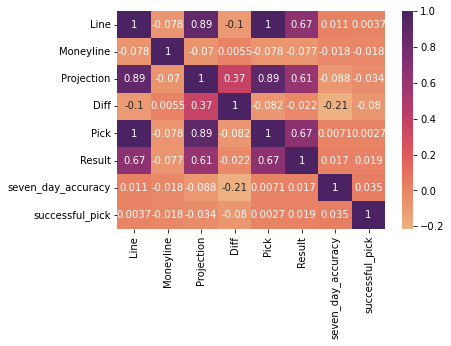

In [16]:
sns.heatmap(data=df.corr(), cmap='flare', annot=True)
plt.savefig('basecorr.svg')

In [ ]:
#Pick & Line are perfectly correlated-- dump one in final version (Pick your days are numbered).

In [17]:
lr = LinearRegression()

In [18]:
#Define Targets - I think I'm supposed to reshape this.
y = ohe_df.Result

In [19]:
y

0       11
1        5
2       14
3       14
4       13
        ..
4621    21
4622     3
4623     4
4624     2
4625     2
Name: Result, Length: 4626, dtype: int64

In [20]:
# Define Features
X = ohe_df.drop(['Result', 'Date', 'Name', 'Pick'], axis=1)

In [21]:
X

,Line,Moneyline,Projection,Diff,seven_day_accuracy,team_is_ATL,team_is_BKN,team_is_BOS,team_is_CHA,team_is_CHI,team_is_CLE,team_is_DAL,team_is_DEN,team_is_DET,team_is_GSW,team_is_HOU,team_is_IND,team_is_LAC,team_is_LAL,team_is_MEM,team_is_MIA,team_is_MIL,team_is_MIN,team_is_NOR,team_is_NYK,team_is_OKC,team_is_ORL,team_is_PHI,team_is_PHO,team_is_POR,team_is_SAC,team_is_SAS,team_is_TOR,team_is_UTH,team_is_WAS,is_C,is_F,is_F-C,is_F-G,is_G,opp_is_ATL,opp_is_BKN,opp_is_BOS,opp_is_CHA,opp_is_CHI,opp_is_CLE,opp_is_DAL,opp_is_DEN,opp_is_DET,opp_is_GSW,opp_is_HOU,opp_is_IND,opp_is_LAC,opp_is_LAL,opp_is_MEM,opp_is_MIA,opp_is_MIL,opp_is_MIN,opp_is_NOR,opp_is_NYK,opp_is_OKC,opp_is_ORL,opp_is_PHI,opp_is_PHO,opp_is_POR,opp_is_SAC,opp_is_SAS,opp_is_TOR,opp_is_UTH,opp_is_WAS,is_Away,is_Home,is_Over,is_Under,is_0,is_1
0,15.5,-115,16.57,1.07,0.47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,14.5,-115,15.29,0.79,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,15.5,-115,12.85,-2.65,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,12.5,-105,16.72,4.22,0.42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
4,12.5,-113,15.71,3.21,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,5.5,-105,2.91,-2.59,0.55,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4622,7.5,115,3.35,-4.15,0.51,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4623,5.5,-130,4.33,-1.17,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4624,8.5,-105,6.11,-2.39,0.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [22]:
lr.fit(X,y)

LinearRegression()

In [23]:
preds = lr.predict(X)

In [24]:
# R2 Score - Unsurprisingly the betting info has some baseline predictive power. Basically right now I am modelling a model.
lr.score(X,y)

0.45494411631035203

In [25]:
 lr.intercept_

10752518025.874113

In [26]:
# Coef is predictive power of a given feature? Multicollinearity present too. Lending to misattribution of predictvie power.
lr.coef_

array([ 3.52484492e+01, -3.27691701e-03, -3.42820349e+01,  3.44140495e+01,
        2.66081383e+00,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  1.26591735e+11,
        1.26591735e+11,  1.26591735e+11,  1.26591735e+11,  1.26591735e+11,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -

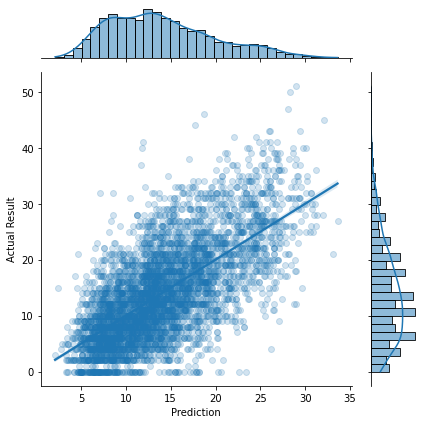

<Figure size 432x288 with 0 Axes>

In [27]:
ax = sns.jointplot(x=preds, y=y, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)})
ax.set_axis_labels(xlabel='Prediction', ylabel='Actual Result')
plt.tight_layout()
plt.show()
plt.savefig('lrplot.svg')

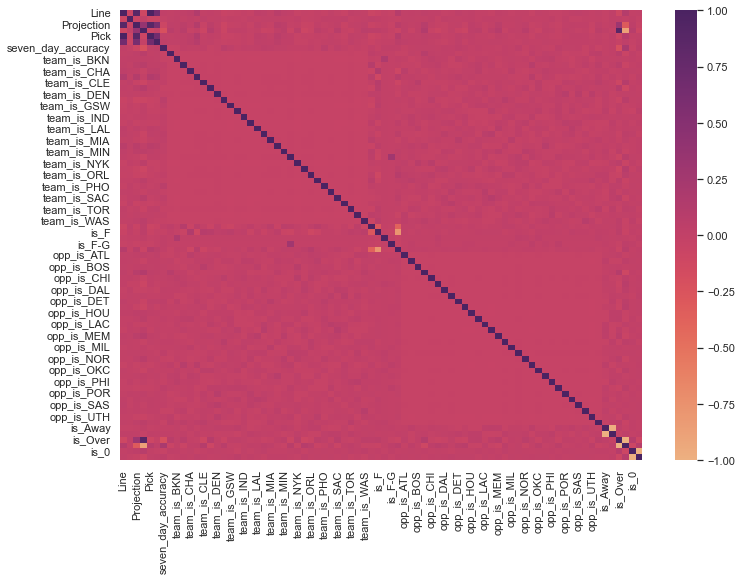

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(data=ohe_df.corr(), cmap='flare')
plt.savefig('ohe_corr.svg')